 ### Propuesta de trabajo 

  

Presentación grupal, puede ser utilizando diapositivas o jupyter lab. 

1. Presentación de los datos, definición de variables y contexto de la problemática. (10 puntos) 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import matplotlib.pyplot as plt
import matplotlib.style as style

# Seaborn Library Setting
import seaborn as sns
sns.set_style("darkgrid")
style.use('seaborn-talk') #sets the size of the charts
style.use('ggplot')
sns.set_context('talk') # Sets the font of the figures , talk -- presentation-friendly

import altair as alt
import ipywidgets as widgets

from datetime import date
from ipywidgets import interactive, interact
alt.themes.enable('opaque')


%matplotlib inline

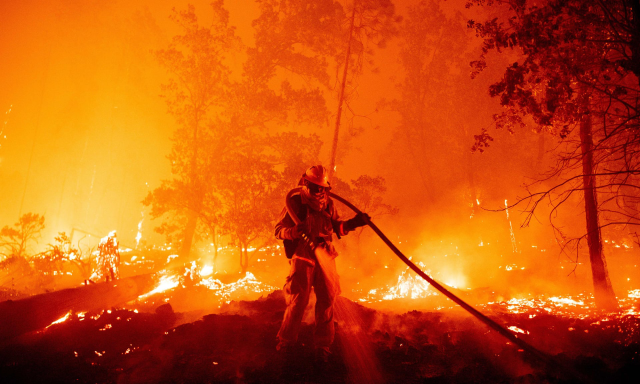

In [2]:
from pathlib import Path
from PIL import Image
incendio = Image.open(Path().resolve().parent / "data"/ "incendio.jpg" ).reduce(factor=3)
# incendio = Image(filename="incendio.jpg", width=200)
incendio


In [3]:
# Read data file and create pandas data frame
Fires= pd.read_csv(os.path.join("..", "data", "California_Fire_Incidents.csv"))
Fires["Extinguished"]

0       2013-09-06T18:30:00Z
1       2013-06-08T18:30:00Z
2       2013-07-30T18:00:00Z
3       2013-08-30T08:00:00Z
4       2013-05-11T06:30:00Z
                ...         
1631    2019-10-10T18:11:00Z
1632    2019-06-28T17:33:00Z
1633                     NaN
1634                     NaN
1635                     NaN
Name: Extinguished, Length: 1636, dtype: object

In [4]:
Fires.describe(include="all").T  #Se eliminan columnas con demasiados datos nulos, erróneas (Como countyIds que tenían más
                                          #unique values que los counties, e innecesarias para el análisis

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AcresBurned,1633,NaN,NaN,NaN,4589.44,27266.3,0,35,100,422,410203
Active,1636,1,False,1636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdminUnit,1636,494,CAL FIRE Sonoma-Lake-Napa Unit,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AirTankers,28,NaN,NaN,NaN,4.07143,6.39982,0,2,2,4,27
ArchiveYear,1636,NaN,NaN,NaN,2016.61,1.84534,2013,2015,2017,2018,2019
CalFireIncident,1636,2,True,1251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CanonicalUrl,1636,1607,/incidents/2013/6/10/sonoma-lake-napa-unit-lig...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConditionStatement,284,258,"Current Situation: 28 remote wildland fires, r...",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ControlStatement,111,92,All road closures have been lifted.,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Counties,1636,59,Riverside,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Fires["CalFireIncident"]

0        True
1        True
2        True
3       False
4        True
        ...  
1631     True
1632     True
1633    False
1634    False
1635    False
Name: CalFireIncident, Length: 1636, dtype: bool

In [6]:
Fires[Fires.loc[:,"CalFireIncident"]==False].count()

AcresBurned             382
Active                  385
AdminUnit               385
AirTankers                3
ArchiveYear             385
CalFireIncident         385
CanonicalUrl            385
ConditionStatement       26
ControlStatement          8
Counties                385
CountyIds               385
CrewsInvolved             6
Dozers                    5
Engines                   6
Extinguished            362
Fatalities                1
Featured                385
Final                   385
FuelType                  4
Helicopters               6
Injuries                  3
Latitude                385
Location                385
Longitude               385
MajorIncident           385
Name                    385
PercentContained        382
PersonnelInvolved        14
Public                  385
SearchDescription       377
SearchKeywords          324
Started                 385
Status                  385
StructuresDamaged         3
StructuresDestroyed       7
StructuresEvacuated 

In [7]:
Fires=Fires.drop(['AirTankers','ConditionStatement', 'CountyIds','ControlStatement','CrewsInvolved','Dozers','Engines','FuelType','Helicopters','WaterTenders','Fatalities','Injuries','PersonnelInvolved','StructuresDamaged','StructuresDestroyed',                                  'StructuresThreatened','StructuresEvacuated','AdminUnit','CanonicalUrl','SearchDescription','SearchKeywords','UniqueId','Featured','Location','Name','PercentContained','Public','MajorIncident','Status','Active', 

                                 'Final','Updated','CalFireIncident'], axis=1) 

In [8]:
Fires.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AcresBurned,1633,NaN,NaN,NaN,4589.44,27266.3,0,35,100,422,410203
ArchiveYear,1636,NaN,NaN,NaN,2016.61,1.84534,2013,2015,2017,2018,2019
Counties,1636,59,Riverside,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Extinguished,1577,1038,2018-01-09T13:46:00Z,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,1636,NaN,NaN,NaN,37.204,135.401,-120.258,34.1659,37.1041,39.0868,5487
Longitude,1636,NaN,NaN,NaN,-108.083,37.0069,-124.196,-121.768,-120.462,-117.474,118.908
Started,1636,1597,2013-06-10T00:46:00Z,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Fires["Hectares"]=Fires["AcresBurned"]/2.4711
Fires.drop(axis=1, columns="AcresBurned")

,ArchiveYear,Counties,Extinguished,Latitude,Longitude,Started,Hectares
0,2013,Tuolumne,2013-09-06T18:30:00Z,37.857000,-120.086000,2013-08-17T15:25:00Z,104129.335114
1,2013,Los Angeles,2013-06-08T18:30:00Z,34.585595,-118.423176,2013-05-30T15:28:00Z,12251.224151
2,2013,Riverside,2013-07-30T18:00:00Z,33.709500,-116.728850,2013-07-15T13:43:00Z,11141.192182
3,2013,Placer,2013-08-30T08:00:00Z,39.120000,-120.650000,2013-08-10T16:30:00Z,11104.366476
4,2013,Ventura,2013-05-11T06:30:00Z,0.000000,0.000000,2013-05-02T07:01:00Z,9813.848084
...,...,...,...,...,...,...,...
1631,2019,Riverside,2019-10-10T18:11:00Z,33.827979,-117.499619,2019-10-10T12:08:00Z,3.642103
1632,2019,Nevada,2019-06-28T17:33:00Z,39.409722,-121.000556,2019-06-28T15:03:04Z,0.809356
1633,2019,Yolo,NaN,38.734634,-121.729691,2019-11-25T12:02:02Z,NaN
1634,2019,San Diego,NaN,33.351145,-117.403719,2019-10-22T19:20:44Z,NaN


In [10]:
#     for i in range(1636):
#         print(Calif_Fire_Inc.iloc[i,2])


2. ¿Cuál es la pregunta que desean resolver? (5 puntos) 

¿Cuántas acres, en qué fechas y en qué ubicación es más probable que ocurran incendios en los próximos años?

3. Análisis estadístico de los datos. (15 puntos) 

In [11]:
from datetime import datetime,date

date=pd.DatetimeIndex(Fires.Started)

Fires["Mes"]=date.month   #Se parsea la fecha para revisar cualquier error y para dividir por temporadas
Fires["Mes"]=Fires["Mes"].dropna(axis=0, inplace=False)
Fires["Año"]=date.year
Fires["Año"]=Fires["Año"].dropna(axis=0, inplace=False)
Fires["Dia"]=date.day
Fires["Dia"]=Fires["Dia"].dropna(axis=0, inplace=False)

Fires["Fecha"]=pd.to_datetime(Fires["Started"]).dt.date
Fires["Fecha"]= pd.to_datetime(Fires["Fecha"]).dt.normalize()  #Se restaura formato pero con el display modificado

Fires["Fecha"]

0      2013-08-17
1      2013-05-30
2      2013-07-15
3      2013-08-10
4      2013-05-02
          ...    
1631   2019-10-10
1632   2019-06-28
1633   2019-11-25
1634   2019-10-22
1635   2019-10-14
Name: Fecha, Length: 1636, dtype: datetime64[ns]

In [12]:
a=Fires.loc[:,"Dia"].unique()
print(sorted(a))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [13]:
b=Fires.loc[:,"Mes"].unique()
print(sorted(b))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [14]:
c=Fires.loc[:,"Año"].unique()
print(sorted(c))
c.dtype

[1969, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


dtype('int64')

In [15]:
Fires= Fires[Fires.Año != 1969] #Se elimina año que no aporta al análisis
c=Fires.loc[:,"Año"].unique()
print(sorted(c))

[2013, 2014, 2015, 2016, 2017, 2018, 2019]


<p>Agrupación por temporadas:</p>
   <p> Primavera: desde el 21 de marzo al 20 de junio. </p>
    <p>Verano: desde el 21 de junio al 22 de septiembre. </p>
    <p>Otoño: desde el 23 de septiembre al 20 de diciembre. </p>
    <p>Invierno: desde el 21 de diciembre al 20 de marzo.</p>


In [16]:
date = Fires.Fecha.dt.month*100 + Fires.Fecha.dt.day
Fires['Estacion'] = (pd.cut(date,[0,321,620,922,1220,1300],
                       labels=['Invierno','Primavera','Verano','Otoño','Invierno '])
                  .str.strip())

Fires['date_offset'] = (Fires.Fecha.dt.month*100 + Fires.Fecha.dt.day - 320)%1300

Fires['Estacion'] = pd.cut(Fires['date_offset'], [0, 300, 602, 900, 1300], 
                           labels=['Primavera', 'Verano', 'Otoño', 'Invierno'])
Fires.loc[:,"Estacion"]

0          Verano
1       Primavera
2          Verano
3          Verano
4       Primavera
          ...    
1631        Otoño
1632       Verano
1633        Otoño
1634        Otoño
1635        Otoño
Name: Estacion, Length: 1634, dtype: category
Categories (4, object): ['Primavera' < 'Verano' < 'Otoño' < 'Invierno']

In [17]:
Fires["Estacion"].value_counts().index

CategoricalIndex(['Verano', 'Primavera', 'Otoño', 'Invierno'], categories=['Primavera', 'Verano', 'Otoño', 'Invierno'], ordered=True, dtype='category')

In [18]:
v=Fires["Estacion"].value_counts()
v

Verano       968
Primavera    391
Otoño        247
Invierno      28
Name: Estacion, dtype: int64

In [19]:
v=Fires["Estacion"].value_counts().to_frame(name="Incendios")
# v.rename(axis={"Estaciones", "Incendios"})
v=v.reset_index() 
v["index"]=v["index"].astype(str)
v.dtypes, v

(index        object
 Incendios     int64
 dtype: object,
        index  Incendios
 0     Verano        968
 1  Primavera        391
 2      Otoño        247
 3   Invierno         28)

4. Visualización de variables. (15 puntos) 

In [20]:
admin_indx = Fires["Counties"].value_counts().index

admin_count = Fires["Counties"].value_counts().values
admin_count

array([146,  89,  66,  64,  64,  62,  57,  57,  53,  51,  49,  46,  45,
        39,  37,  36,  36,  35,  35,  32,  31,  30,  29,  28,  27,  25,
        25,  22,  22,  21,  20,  20,  19,  18,  17,  17,  15,  14,  13,
        12,  12,  11,  11,  10,  10,   8,   8,   6,   6,   5,   5,   4,
         3,   3,   2,   2,   2,   1,   1], dtype=int64)

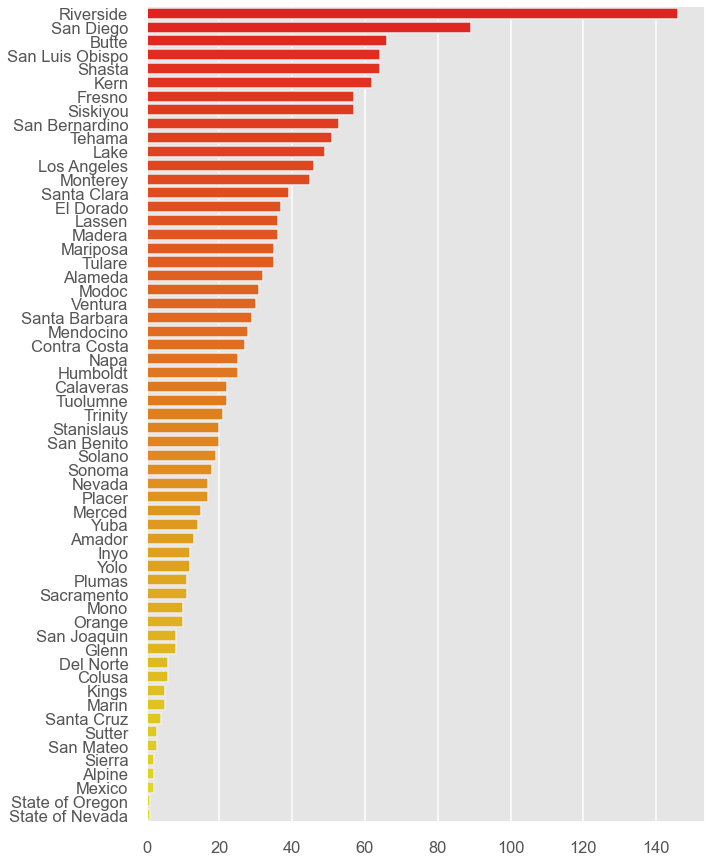

In [87]:
plt.figure(figsize=(10,15))
sns.set_context("talk")
sns.barplot( x =admin_count, y=admin_indx, palette  = "autumn");


In [71]:
Hectareasfecha=alt.Chart(Fires).mark_bar().encode(
    x=alt.X('Fecha:T', axis=alt.Axis(title="Fecha")),
    y=alt.Y('Hectares:Q', axis=alt.Axis(title='Área quemada, ha')),
    tooltip=[alt.Tooltip('Hectares',title="Hectáreas"), alt.Tooltip("Fecha",title="Fecha UTC")]).properties(title="Hectáreas ",
    width=400, 
    height=400).interactive()
Hectareasest=alt.Chart(Fires).mark_bar().encode(
    x=alt.X('Estacion:N', axis=alt.Axis(title="Estación")),
    y=alt.Y('Hectares:Q', axis=alt.Axis(title='Área quemada, ha')),
    tooltip=[alt.Tooltip('Hectares',title="Hectáreas"), alt.Tooltip("Fecha",title="Fecha UTC")]).properties(title="Hectáreas ",
    width=400, 
    height=400).interactive()



Hectareasfecha&Hectareasest

alt.VConcatChart(...)

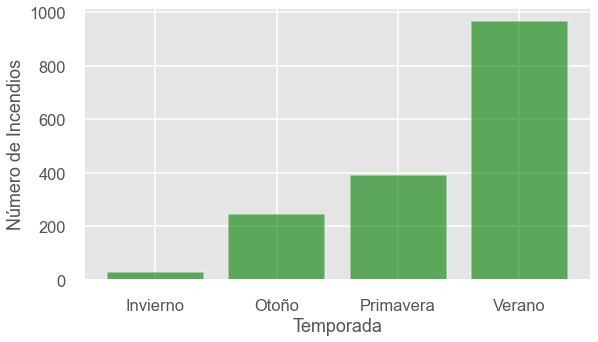

In [70]:
y = list(reversed(list(v["Incendios"])))
x=list(reversed(list(v["index"])))
fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)
plt.bar(x, y, align='center', color="g", alpha=0.6)
plt.xticks()
plt.xlabel("Temporada")
plt.ylabel('Número de Incendios')

plt.show()

In [43]:
temporadas

['Verano', 'Primavera', 'Otoño', 'Invierno']

In [ ]:

type(temporadas)
lista=[]
for i in temporadas:
    lista.append(i)
lista

5. ¿Hay que realizar preprocesamiento? (15 puntos) 

6. ¿Hay que realizar inputación de datos faltantes? (15 puntos) 

7. ¿Hay que realizar balanceo de datos? (15 puntos) 

8. Propuesta de cuatro modelos y sus hiperparámetros asociados. (20 puntos) 